In [1]:
import image_similarity as imgsim

### Initialise the Class

Having loaded in the library above, you can then initialise the class object. For this you will be required to pass in a string argument to specify the neural network architecture that you wish to load - e.g. resnet50

A second argument is available to specify the weights that you wish to load. At present the functionality only accomodates model weights that are supported as standard by Pytorch's torchvision library

In [2]:
ImgSim = imgsim.Img2Vec('vgg19', weights='DEFAULT')

In [ ]:
# observe several of the class attributes post-initialisation
print(ImgSim.architecture)
print(ImgSim.weights)
print(ImgSim.transform)
print(ImgSim.device)
print(ImgSim.model)

The final line of the above cell prints the neural network architecture used. However, for the purpose of embedding our images as vectors, we are interested in extracting the feature embeddings. 

### Create Embeddings Dataset

In [3]:
ImgSim.process_individual_image("D:\workspace\Engagement-via-RL-ET\data\ImgData", "D:\workspace\Engagement-via-RL-ET\data\EmbedData")
# ImgSim.dataset.shape

Processed and saved embedding for ad.png
Processed and saved embedding for ae.png
Processed and saved embedding for af.png
Processed and saved embedding for ag.png
Processed and saved embedding for ai.png
Processed and saved embedding for al.png
Processed and saved embedding for am.png
Processed and saved embedding for ao.png
Processed and saved embedding for aq.png
Processed and saved embedding for ar.png
Processed and saved embedding for as.png


d:\software\miniconda\envs\similarity\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed and saved embedding for at.png
Processed and saved embedding for au.png
Processed and saved embedding for aw.png
Processed and saved embedding for ax.png
Processed and saved embedding for az.png
Processed and saved embedding for ba.png
Processed and saved embedding for bb.png
Processed and saved embedding for bd.png
Processed and saved embedding for be.png
Processed and saved embedding for bf.png
Processed and saved embedding for bg.png
Processed and saved embedding for bh.png
Processed and saved embedding for bi.png
Processed and saved embedding for bj.png
Processed and saved embedding for bl.png
Processed and saved embedding for bm.png
Processed and saved embedding for bn.png
Processed and saved embedding for bo.png
Processed and saved embedding for bq.png
Processed and saved embedding for br.png
Processed and saved embedding for bs.png
Processed and saved embedding for bt.png
Processed and saved embedding for bv.png
Processed and saved embedding for bw.png
Processed and sa

### Return most similar images to a target image

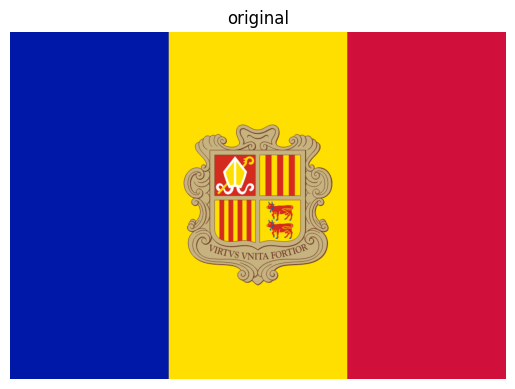

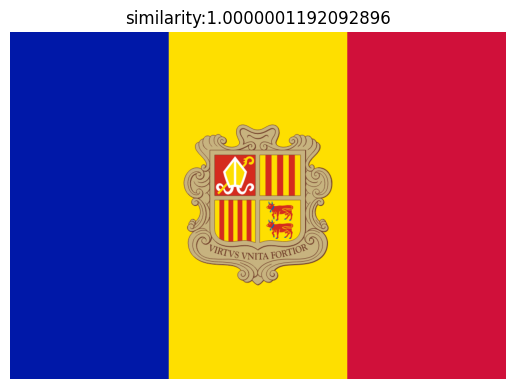

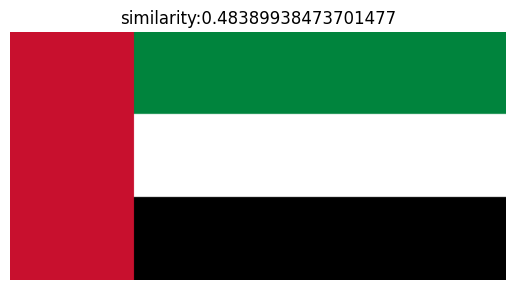

{'D:\\workspace\\ImageSimilarity\\ImgData\\ad.png': 1.0000001192092896,
 'D:\\workspace\\ImageSimilarity\\ImgData\\ae.png': 0.48389938473701477}

In [16]:
ImgSim.similar_images(r"D:\workspace\ImageSimilarity\ImgData\ad.png", n=5)

The above shows surprisingly good results for an out the box CNN model - which has not been trained for this specific use case (identifying furniture). 

- Tables: The model correctly identifies the most similar images, effectively separating between dining tables vs coffee tables
- Sofas: The model correctly identifies the most similar images, effectively differentiating between images where the sofa features in some context vs where the sofa is the only object in the image
- Shelves: Unfortunately the results were not as clean in this category. The hope had been to differentiate between wall mounted and free standing shelves, however, there is some overlap in the results outputted

### Save the embedded image dataset for future

In [ ]:
ImgSim.save_dataset("C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data")

#### Load previously embedded dataset

In [ ]:
ImgSim.load_dataset("C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/tensors.pt")

#### Cluster embedded dataset

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 222.24it/s, center_shift=0.000000, iteration=4, tol=0.000100] 


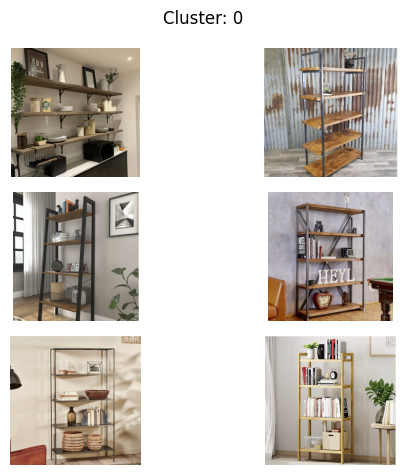

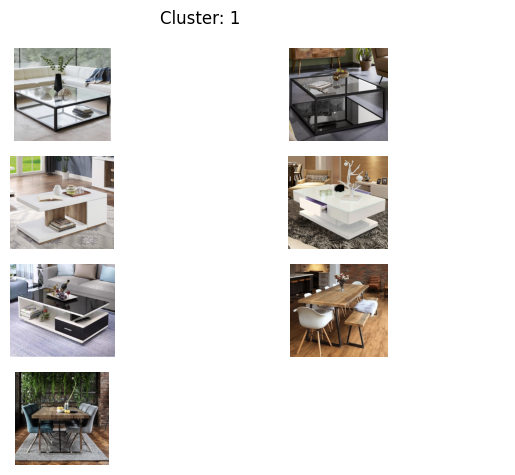

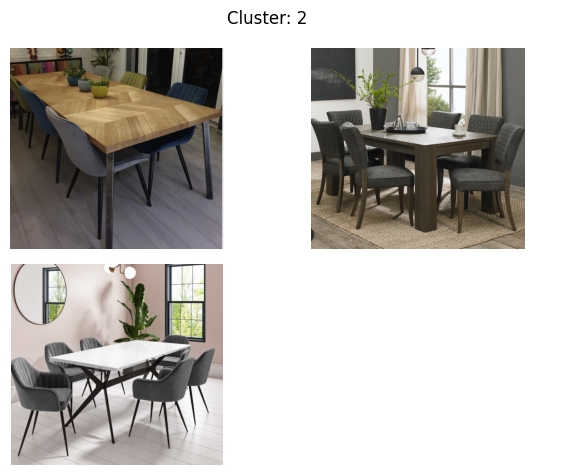

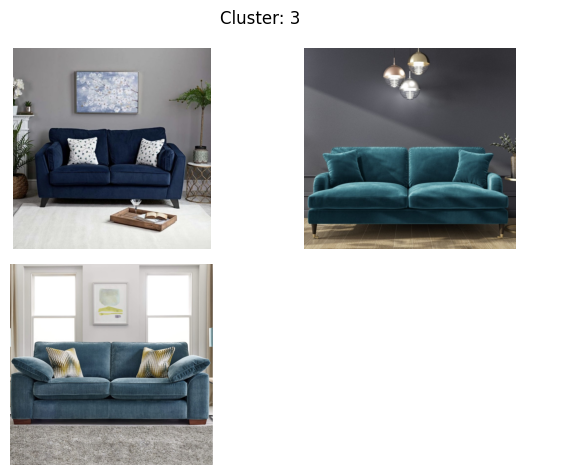

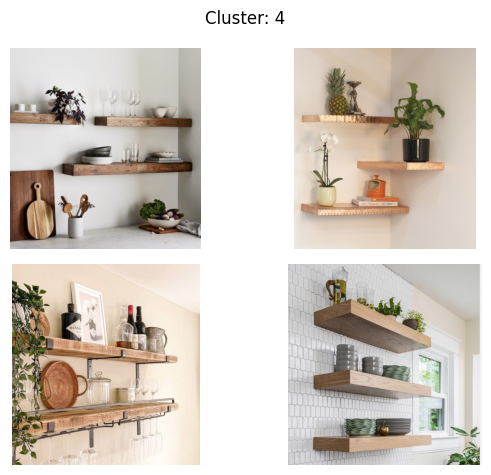

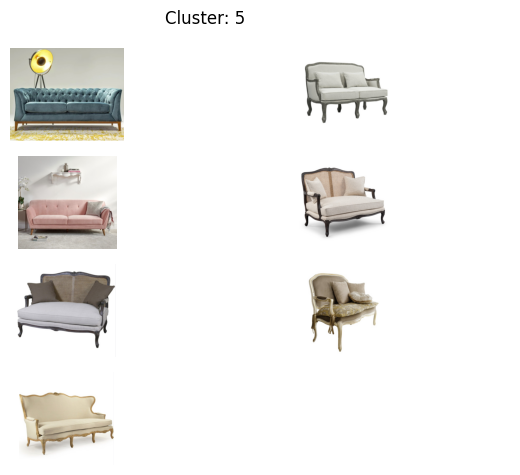

In [ ]:
ImgSim.cluster_dataset(nclusters=6, display=True)

While the results from the unsupervised clustering are not terrible, they do leave significant room for improvement. From the above you can see that at the very least the model has been able to differentiate between the three main furniture groups, with images of tables vs sofas vs shelves, all falling into different clusters. However, given that within each of the three categories there are two different themes present (i.e. coffee vs dinner tables, free-standing vs wall-mounted shelves, sofa with background vs sofa without) the hope would have been for these 6 clusters to form cleanly.

Still considering the fact that the ResNet weights used come from the model that has been pre-trained on ImageNet dataset, it has generalised quite well. Improving these results would likely require custom training the CNN on domain specific data - in this case images of different items of furniture. Fine-tuning the ResNet model for a task such as image classification would result in the model being more tailored to identifying specific features that represent the key characteristics of our classes - e.g. legs for free-standing shelves vs wall-mounted